#  IPL Stock Synergy: Decoding Market Dynamics with Cricket Analytics

First of all we are importing the all the essential Liabraries

In [9]:
import numpy as np
import pandas as pd #for data cleaning
import matplotlib.pyplot as plt #for visualization
import  seaborn as sns # for graphical visualization

#We also have to import date and time module because we have date and time in data set
from datetime import datetime

In [10]:
df=pd.read_csv("NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
...,...,...,...,...,...,...,...
3114,2022-05-17,189.169998,191.399994,185.169998,190.559998,190.559998,9876700
3115,2022-05-18,186.720001,187.699997,176.270004,177.190002,177.190002,9665600
3116,2022-05-19,178.050003,186.300003,175.710007,183.479996,183.479996,10448500
3117,2022-05-20,185.869995,190.190002,179.770004,186.350006,186.350006,10422600


In [11]:
sns.set(rc={"figure.figsize": (10,5)}) #Its done to fix the size of plot

#Here is the short explanation of this command

The Python code `sns.set(rc={"figure.figsize": (10,5)})` is using the Seaborn library to set the default size of the figures (plots) created using Seaborn and Matplotlib. Here's a detailed explanation of the components:

1. **Seaborn (sns)**: Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

2. **sns.set()**: This function is used to set aesthetic parameters in Seaborn. It can be used to control various aspects of the aesthetics of the plots.

3. **rc parameter**: The `rc` parameter in `sns.set()` is a dictionary that contains key-value pairs corresponding to Matplotlib parameters. `rc` stands for "run commands". By setting this parameter, you can customize various properties of the plots.

4. **"figure.figsize"**: This is a Matplotlib parameter that specifies the size of the figure (plot). It is a tuple with two values representing the width and height of the figure in inches.

5. **(10, 5)**: This tuple sets the width of the figure to 10 inches and the height to 5 inches. This means that any plot created after this command will have a default size of 10 inches by 5 inches.

In summary, `sns.set(rc={"figure.figsize": (10,5)})` sets the default size for all figures created with Seaborn and Matplotlib to 10 inches wide and 5 inches tall. This is useful for ensuring consistency in the appearance of plots throughout your analysis or presentation.

# NOW SETTING DATE AS INDEX

In [12]:
df["Date"] = pd.to_datetime(df["Date"])
df=df.set_index("Date")


In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900


# Analysis of Vloume Of Stock

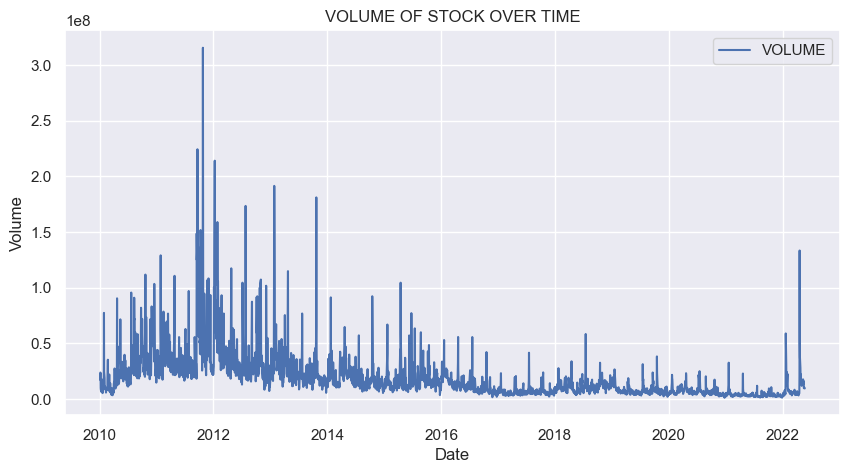

In [14]:
sns.lineplot(x=df.index, y=df["Volume"], label="VOLUME")
plt.title("VOLUME OF STOCK OVER TIME")
plt.show()

# NETFLIX STOCK PRICE ANALYSIS (HIGH, CLOSE, OPEN)

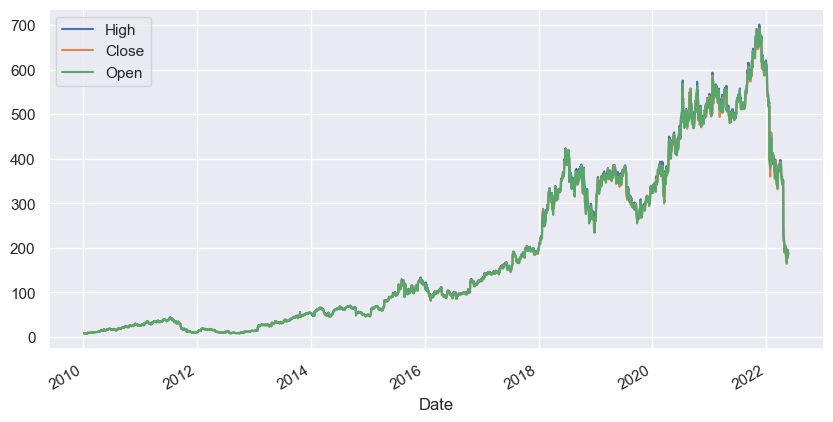

In [15]:
df.plot( y=["High","Close","Open"])
plt.show()

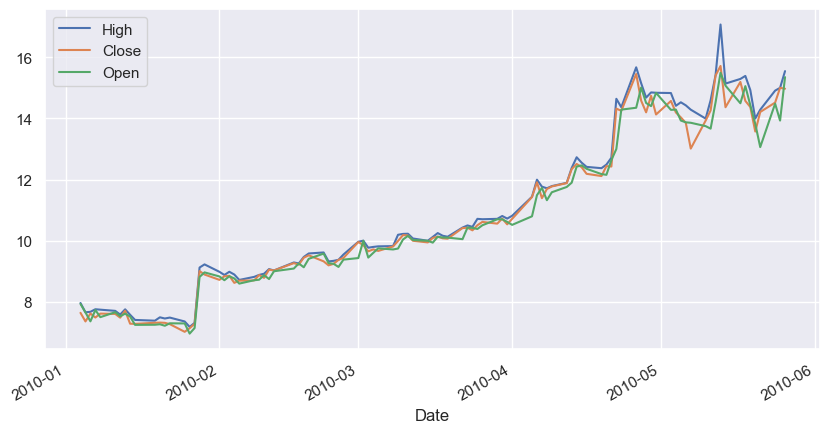

In [16]:
#Now for clearly shwoing the graph i can just simply lessesing the data so that the lines becomes easily visible 
ds=df.head(100)
ds.plot( y=["High","Close","Open"])
plt.show()

# NETFLIX STOCK PRICE ANALYSIS (DAY, MONTH , YEAR WISE)

<Axes: xlabel='YEAR'>

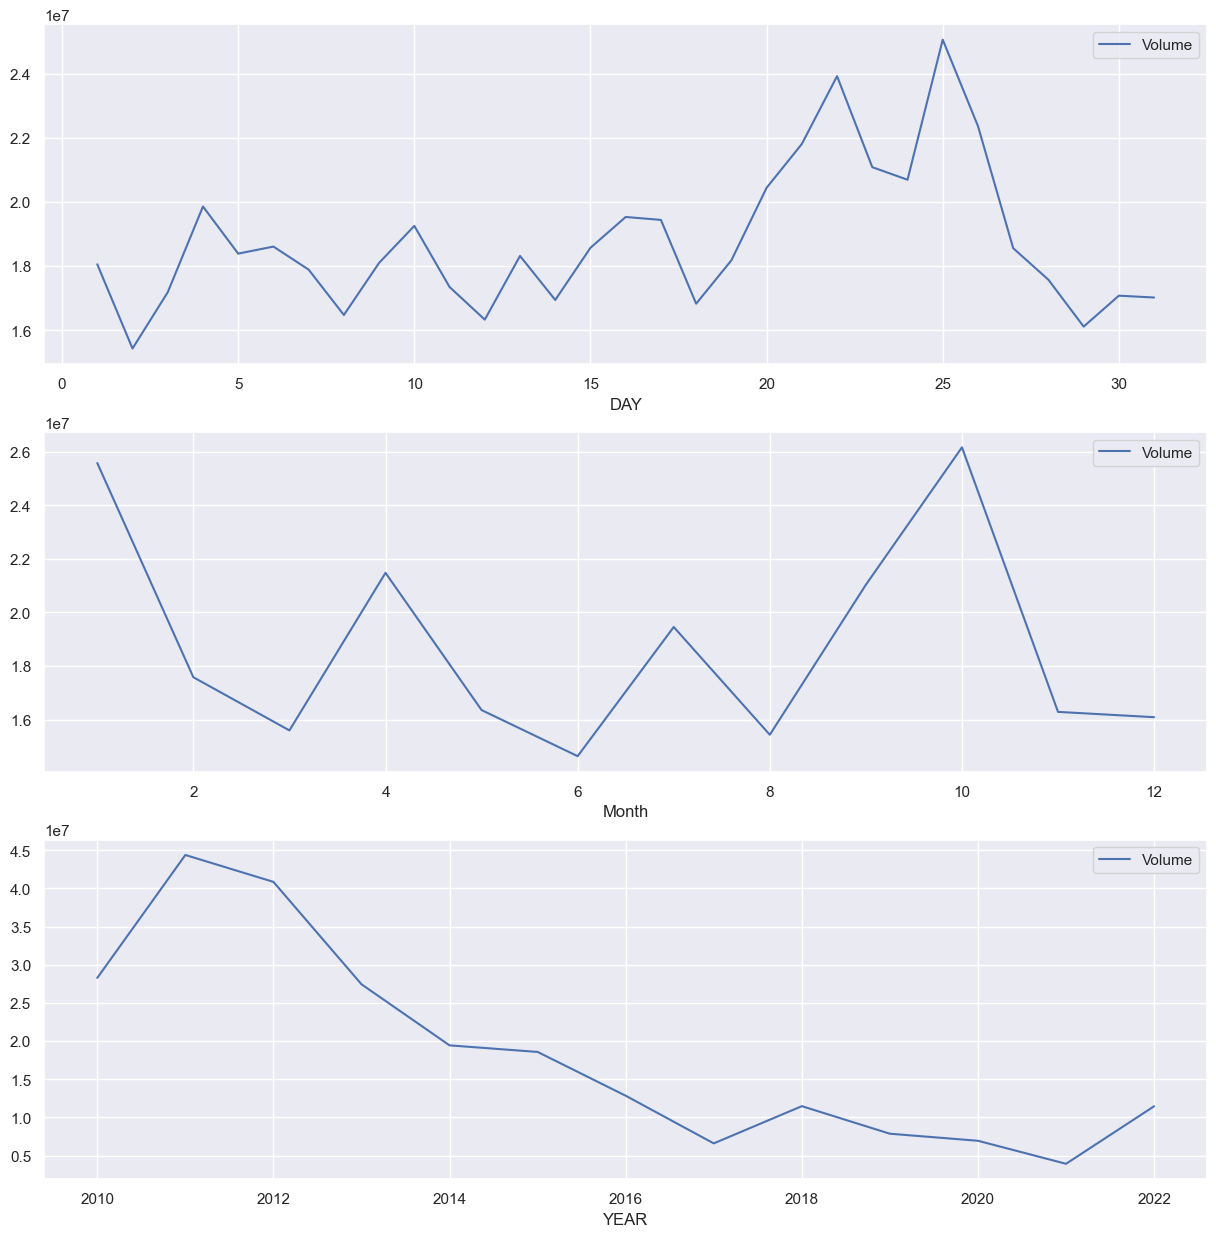

In [17]:
fig, (ax1,ax2,ax3)= plt.subplots(3, figsize=(15,15)) #THIS IS FOR CREATING ALL THE GRAPHS IN THE SINGLE COMMAND
df.groupby(df.index.day).mean().plot(y="Volume",ax= ax1,xlabel="DAY")
df.groupby(df.index.month).mean().plot(y="Volume",ax= ax2,xlabel="Month")
df.groupby(df.index.year).mean().plot(y="Volume",ax= ax3,xlabel="YEAR")

# DATES WITH HIGHEST STOCK PRICES

In [18]:

a=df.sort_values(by="High", ascending=False).head(5)
a["High"]

Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

# DATES WITH LOWEST STOCK PRICES

In [19]:

b=df.sort_values(by="Low", ascending=True).head(5)
b["Low"]

Date
2010-01-25    6.931429
2010-01-26    6.937143
2010-01-27    6.992857
2010-01-06    7.197143
2010-01-21    7.214286
Name: Low, dtype: float64

# NOW VISUALIZING HIGH AND LOW

<Axes: xlabel='Date', ylabel='Low'>

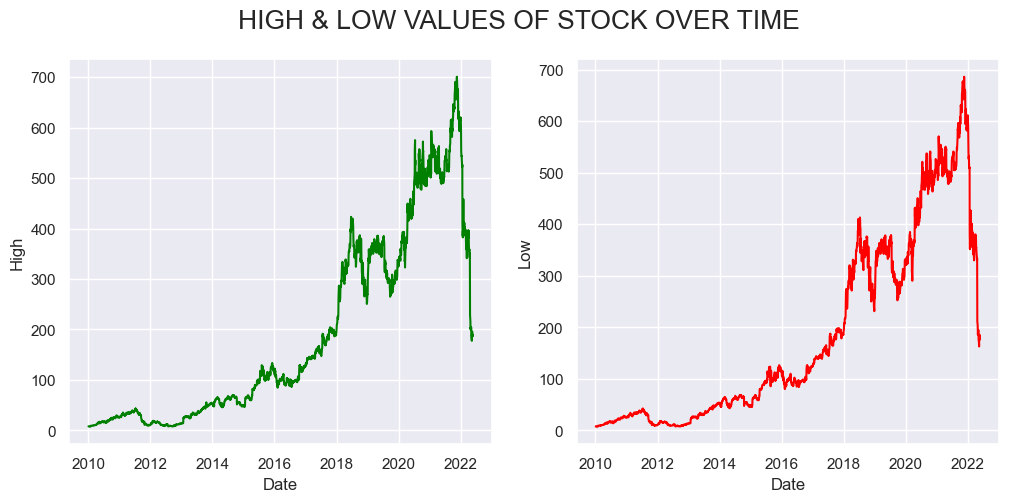

In [20]:
fig, axes=plt.subplots(nrows=1 ,sharex=True, ncols=2,figsize=(12,5))
fig.suptitle("HIGH & LOW VALUES OF STOCK OVER TIME", fontsize=19)
sns.lineplot(ax=axes[0], y=df["High"], x=df.index ,color="green")
sns.lineplot(ax=axes[1], y=df["Low"], x=df.index ,color="red")